# Credit Card Fraud Detection

<b> Dataset <br> 

The dataset focuses on credit card transactions in September 2013, primarily by European cardholders. It consists of 284,807 transactions over two days, with 492 identified as frauds (0.172% of all transactions). Due to confidentiality, original features are not disclosed, except for 'Time' and 'Amount'. The features V1 to V28 result from PCA transformation. 'Time' denotes seconds elapsed since the first transaction, and 'Amount' signifies the transaction amount. The 'Class' feature indicates fraud (1) or non-fraud (0). Due to imbalance, accuracy is better evaluated using Area Under the Precision-Recall Curve (AUPRC), as confusion matrix accuracy is inappropriate for unbalanced classification.






<b> Data Cleaning

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
data.shape

(284807, 31)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()
data['Amount'] = sc.fit_transform(data[['Amount']])
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [12]:
data = data.drop(['Time'],axis = 1)

In [13]:
data.duplicated().any()

True

In [14]:
data.drop_duplicates()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [15]:
data.duplicated().any()

True

In [16]:
data.shape

(284807, 30)

In [17]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
data['Class'].sort_values(ascending=True)

0         0
189814    0
189815    0
189816    0
189817    0
         ..
42741     1
107067    1
10897     1
191690    1
231978    1
Name: Class, Length: 284807, dtype: int64

In [20]:
data['Class'] = data['Class'].sort_values(ascending=True)
plt.show()

<Axes: ylabel='count'>

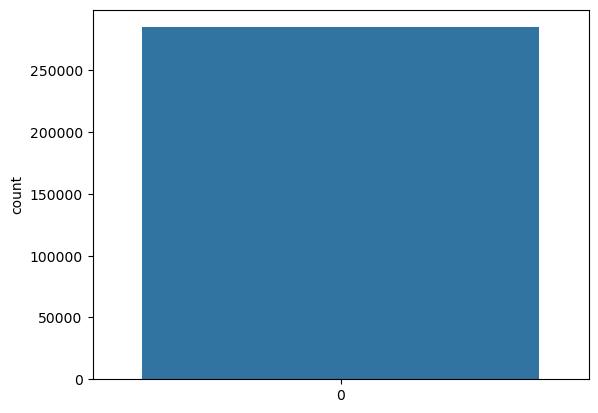

In [21]:
sns.countplot(data['Class'])


# Splitting the dataset into the training set and Test Set

In [22]:
X= data.drop('Class', axis = 1)
y= data['Class']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

<b> Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_pred1 = log.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,y_pred1)

0.9990871107053826

In [29]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [30]:
precision_score(y_test,y_pred1)

0.8484848484848485

In [31]:
recall_score(y_test,y_pred1)

0.5714285714285714

In [32]:
f1_score(y_test,y_pred1)

0.6829268292682927

<b> Imblanced Dataset <br>
    
An imbalanced dataset refers to a situation where the distribution of classes in the dataset is not uniform, meaning that one class is significantly more prevalent than the others. In the context of binary classification, this often means that one class (usually the majority class) has much more representation than the other (minority class).

In your case, the 'Class' column indicates whether a credit card transaction is fraudulent (1) or not (0). If there is a significant difference in the number of fraud (1) and non-fraud (0) instances, the dataset is considered imbalanced.

Handling imbalanced datasets typically involves techniques like undersampling and oversampling:

Undersampling: This involves reducing the number of instances of the majority class to balance it with the minority class. It helps in preventing the model from being biased towards the majority class.

Oversampling: This involves increasing the number of instances of the minority class to balance it with the majority class. It helps in providing the model with more examples of the minority class to learn from.

In [33]:
normal = data[data['Class'] ==0]
fraud = data[data['Class'] == 1]
normal.shape, fraud.shape

((284315, 30), (492, 30))

In [34]:
normal_sample = normal.sample(fraud.shape[0])
normal_sample.shape

(492, 30)

In [35]:
new_data = pd.concat([normal_sample,fraud],ignore_index = True)
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [36]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.045119,-1.542233,1.619181,-1.330641,-0.476311,-1.192360,-1.017589,0.038663,-2.450706,1.578378,...,-0.280459,-0.483957,0.800540,0.449956,-0.757517,-0.502847,0.081954,0.213077,-0.313249,0
1,1.459651,-1.198073,0.908791,-1.374941,-2.014951,-0.644317,-1.468194,0.081248,-1.636281,1.645502,...,-0.019093,0.271763,0.039380,0.485129,0.234811,-0.127023,0.040324,0.014077,-0.344833,0
2,-0.680133,1.313338,-0.538493,-0.469730,0.626348,-0.506004,0.610853,0.461677,-0.316862,-1.324201,...,0.104321,0.484259,-0.263027,-0.539789,-0.150566,0.593687,0.248235,0.187365,-0.276786,0
3,-0.467557,0.924731,-0.196947,-0.683479,0.857271,-0.450301,0.598940,0.078448,0.091703,-0.468221,...,0.075398,0.275262,0.003298,0.612469,-1.021430,0.227131,0.171404,0.311078,-0.327122,0
4,1.808886,-0.699902,-1.411927,-0.101256,0.479882,1.049000,-0.329081,0.385855,1.046042,-0.162235,...,-0.055587,-0.008416,0.175069,-1.647141,-0.286040,0.021527,0.002425,-0.076125,-0.113344,0


In [37]:
#Undersampling


In [38]:
X= new_data.drop('Class', axis = 1)
y= new_data['Class']

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [40]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [41]:
y_pred1 = log.predict(X_test)

In [42]:
accuracy_score(y_test,y_pred1)


0.9238578680203046

In [43]:
precision_score(y_test,y_pred1)

0.9560439560439561

In [44]:
recall_score(y_test,y_pred1)

0.8877551020408163

In [45]:
f1_score(y_test,y_pred1)

0.9206349206349206

<b> Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()  # Add parentheses to initialize the classifier
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [47]:
y_pred2 = dt.predict(X_test)

In [48]:
precision_score(y_test,y_pred2)

0.8913043478260869

In [49]:
recall_score(y_test,y_pred2)

0.8367346938775511

In [50]:
f1_score(y_test,y_pred2)

0.8631578947368421

<b> Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()  # Add parentheses to initialize the classifier
rf.fit(X_train, y_train)


RandomForestClassifier()

In [52]:
y_pred3 = rf.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred3)


0.934010152284264

In [54]:
precision_score(y_test,y_pred3)

0.9775280898876404

In [55]:
recall_score(y_test,y_pred3)

0.8877551020408163

In [56]:
f1_score(y_test,y_pred3)

0.93048128342246

In [57]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [58]:
final_data

,Models,ACC
0,LR,92.385787
1,DT,86.802030
2,RF,93.401015


<Axes: xlabel='Models', ylabel='ACC'>

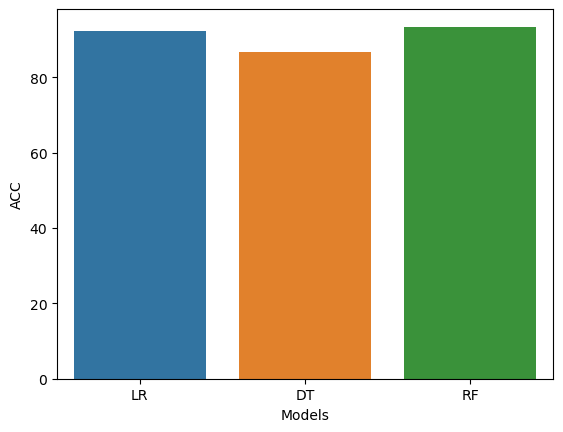

In [59]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])


# OverSampling

In [60]:
# !pip install imbalanced-learn


In [ ]:
X = data.drop('Class',axis=1)
y = data['Class']

In [ ]:
from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE().fit_resample(X,y)
y_res.value_counts()


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

In [64]:
#Logistic Regression
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred1 = log.predict(X_test)


accuracy_score(y_test,y_pred1), precision_score(y_test,y_pred1),recall_score(y_test,y_pred1),f1_score(y_test,y_pred1)




(0.9462655857059951, 0.973841596333352, 0.9173862679022746, 0.9447713038527235)

In [65]:
# Decision Tree Classifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred2 = dt.predict(X_test)


accuracy_score(y_test,y_pred2), precision_score(y_test,y_pred2),recall_score(y_test,y_pred2),f1_score(y_test,y_pred2)


(0.9983205247700614,
 0.9976164186690503,
 0.9990346812693064,
 0.9983250462585392)

In [ ]:
#Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred3 = rf.predict(X_test)

accuracy_score(y_test,y_pred3), precision_score(y_test,y_pred3),recall_score(y_test,y_pred3),f1_score(y_test,y_pred3)



In [ ]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [ ]:
final_data

In [ ]:
sns.barplot(final_data['Models'],final_data['ACC'])


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

LABELS = ['Normal', 'Fraud']

# Assuming you have already predicted y_pred using your models
y_pred_log = log.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Confusion matrix for Logistic Regression
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
sns.heatmap(conf_matrix_log, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix - Logistic Regression")
plt.ylabel('True class')
plt.xlabel('Predicted class')




In [ ]:

# Confusion matrix for Decision Tree Classifier
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.subplot(3, 1, 2)
sns.heatmap(conf_matrix_dt, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix - Decision Tree Classifier")
plt.ylabel('True class')
plt.xlabel('Predicted class')
    


In [ ]:

# Confusion matrix for Random Forest Classifier
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.subplot(3, 1, 3)
sns.heatmap(conf_matrix_rf, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix - Random Forest Classifier")
plt.ylabel('True class')
plt.xlabel('Predicted class')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plotPerColumnDistribution(dataframe, num_columns, plot_size):
    # Sample num_columns from the dataframe
    cols_to_plot = dataframe.sample(num_columns, axis=1)
    
    # Plot the distributions for the selected columns
    plt.figure(figsize=(plot_size, plot_size))
    for i, col in enumerate(cols_to_plot.columns):
        plt.subplot(num_columns, 1, i+1)
        sns.histplot(dataframe[col], bins=30, kde=True)
        plt.title(col)
    
    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame data, and the desired parameters
plotPerColumnDistribution(data, 10, 5)

In [ ]:
plotCorrelationMatrix(data, 8)


In [ ]:
plotScatterMatrix(data, 20, 10)
